<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/QM_Dissipation2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

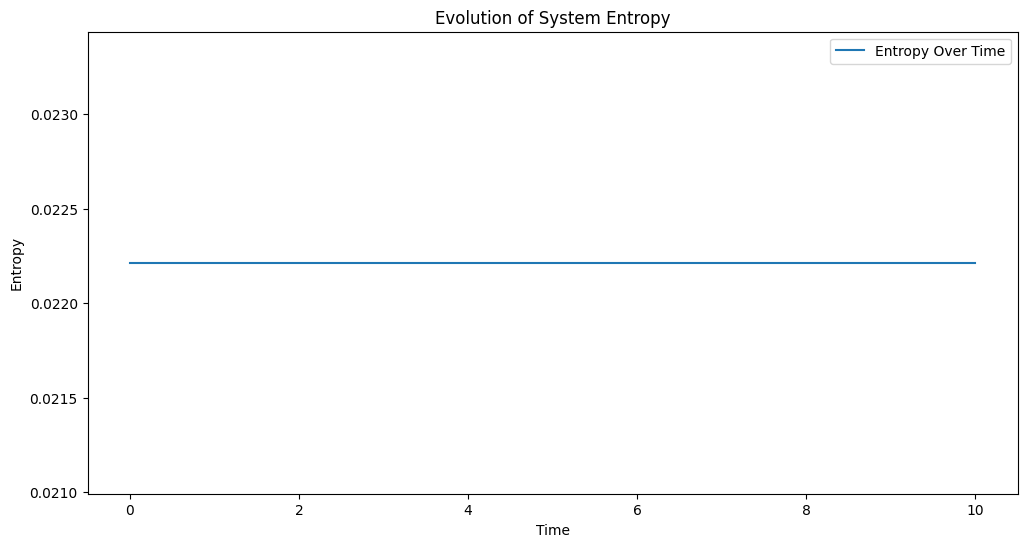

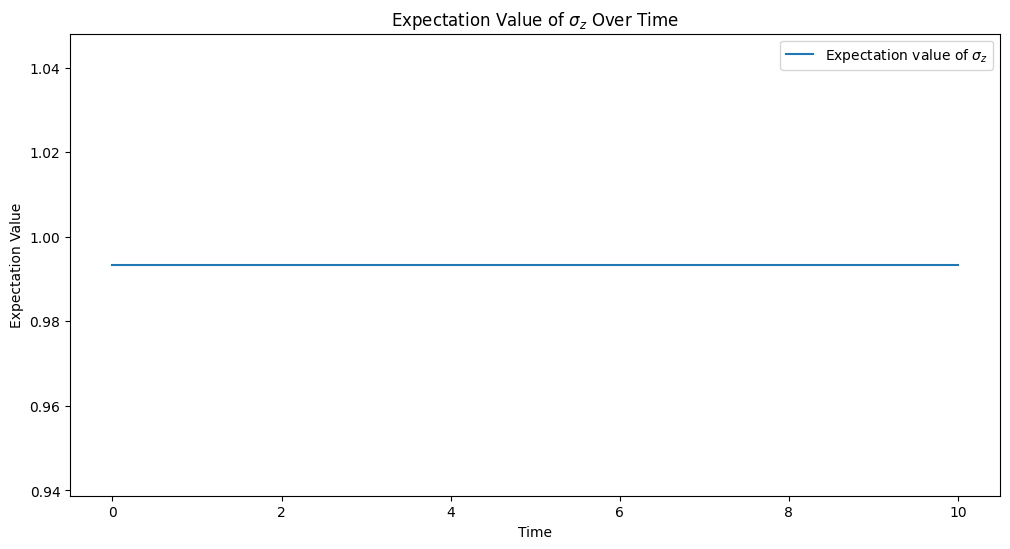

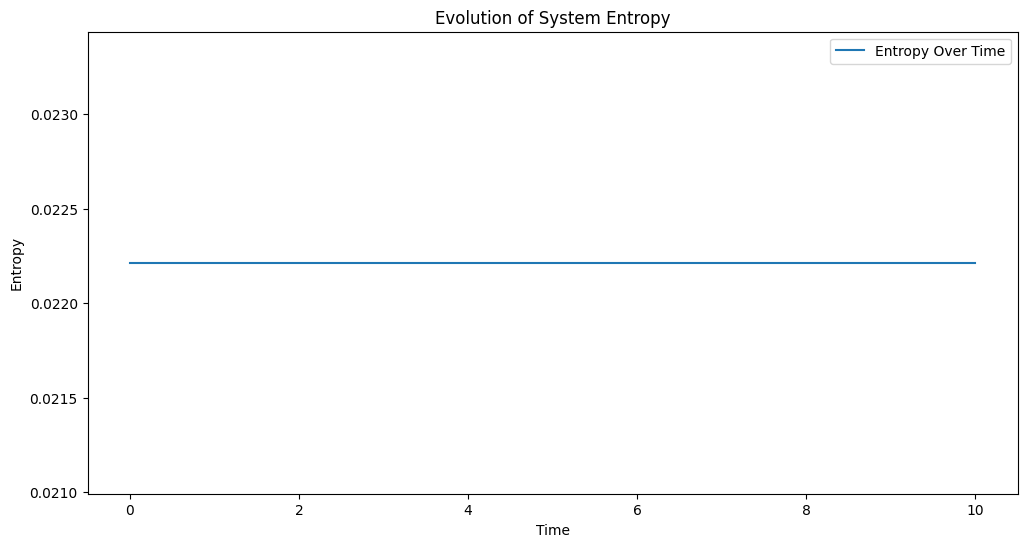

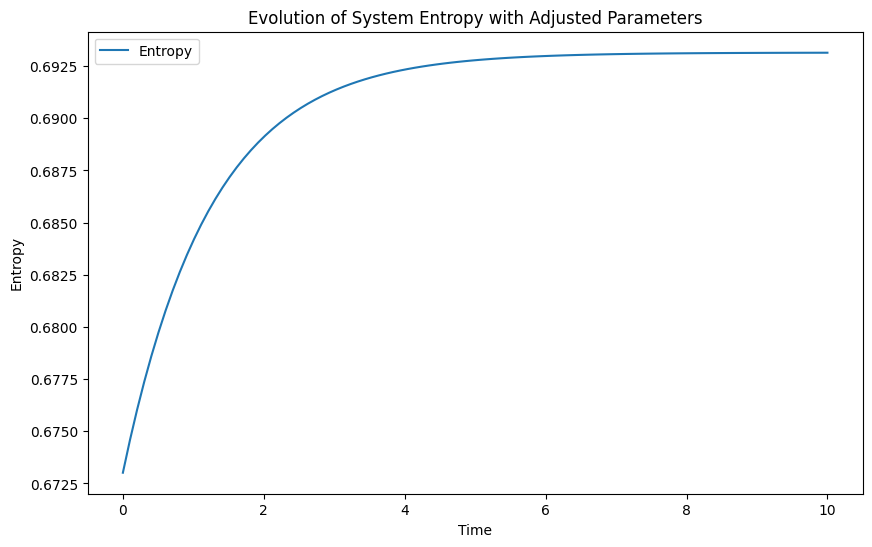

In [6]:
!pip install qutip
import numpy as np
import matplotlib.pyplot as plt
from qutip import basis, sigmaz, sigmax, qeye, mesolve, Qobj, thermal_dm, expect
from qutip import entropy_vn

def effective_hamiltonian(H, T, S_operator):
    """
    Construct an effective Hamiltonian incorporating temperature and entropy effects.
    """
    # For simplicity, assuming the entropy operator S_operator impacts uniformly
    return H - T * S_operator

def thermal_lindblad_operators(T, gamma, system_size=2):
    """
    Generate Lindblad operators for thermal interactions and decoherence.
    """
    # Adjust gamma based on temperature for simplicity
    adjusted_gamma = gamma * T
    return [np.sqrt(adjusted_gamma) * sigmaz()]

# System Parameters
omega = 1.0  # Energy level spacing for the nanomaterial
T = 300  # Temperature in Kelvin
gamma = 0.05  # Base decoherence rate
S = 1  # Arbitrary entropy value for demonstration

# Hamiltonian of the system (using sigmaz for simplicity)
H = omega * sigmaz()

# Initial thermal state of the system
rho0 = thermal_dm(2, 1/T)

# Effective Hamiltonian incorporating free energy considerations
H_eff = effective_hamiltonian(H, T, S * qeye(2))

# Lindblad operators for thermal effects and decoherence
c_ops_thermal = thermal_lindblad_operators(T, gamma)

# Time steps for the simulation
times = np.linspace(0, 10, 100)

# Solve the master equation with thermal effects
result = mesolve(H_eff, rho0, times, c_ops_thermal, [])

# Visualization: Entropy Evolution
# Calculate the von Neumann entropy for each state in the result
entropies = [entropy_vn(state, base=np.e) for state in result.states]

# Plotting the entropy evolution over time
plt.figure(figsize=(12, 6))
plt.plot(times, entropies, label='Entropy Over Time')
plt.xlabel('Time')
plt.ylabel('Entropy')
plt.title('Evolution of System Entropy')
plt.legend()
plt.show

# Visualization: Expectation Value of sigma_z Over Time
expectation_values_sigma_z = expect(sigmaz(), result.states)

plt.figure(figsize=(12, 6))
plt.plot(times, expectation_values_sigma_z, label='Expectation value of $\\sigma_z$')
plt.xlabel('Time')
plt.ylabel('Expectation Value')
plt.title('Expectation Value of $\\sigma_z$ Over Time')
plt.legend()
plt.show()

# Corrected Visualization: Entropy Evolution
entropies = [entropy_vn(state, base=np.e) for state in result.states]

plt.figure(figsize=(12, 6))
plt.plot(times, entropies, label='Entropy Over Time')
plt.xlabel('Time')
plt.ylabel('Entropy')
plt.title('Evolution of System Entropy')
plt.legend()
plt.show()


#################

from qutip import basis, thermal_dm, sigmaz, sigmax, mesolve, expect, entropy_vn, Qobj
import numpy as np
import matplotlib.pyplot as plt

# Adjusted example parameters
omega = 1.0  # Energy level spacing
gamma = 0.2  # Increased decoherence rate for more pronounced effect

H = omega * sigmaz()  # Hamiltonian
temperature = 0.5  # Adjusted temperature for initial thermal state
rho0 = thermal_dm(2, 1/temperature)  # Initial thermal state

c_ops = [np.sqrt(gamma) * sigmax()]  # Adjusted Lindblad operator for stronger decoherence

times = np.linspace(0, 10, 100)  # Simulation time

result = mesolve(H, rho0, times, c_ops, [])

entropies = [entropy_vn(state, base=np.e) for state in result.states]

plt.figure(figsize=(10, 6))
plt.plot(times, entropies, label='Entropy')
plt.xlabel('Time')
plt.ylabel('Entropy')
plt.title('Evolution of System Entropy with Adjusted Parameters')
plt.legend()
plt.show()

